In [2]:
import pandas as pd
import numpy as np
import csv
import re
from string import punctuation
import seaborn as sns
pd.set_option('display.max_columns', 58)
import matplotlib.pyplot as plt
%matplotlib inline

/Users/eliseowang/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
candi = pd.read_csv('list_of_candidates_updated.csv')
small = candi.loc[[0, 1, 6, 7, 9], 'Candidate Name']
ls = []
for i in small:
    ls.append(i.split(' ')[-1])
ls = [i.lower() for i in ls]
ls = set(ls)
# candi = list(candi.loc[[0, 1, 6, 7, 9], 'Candidate Name'].str.split(' ').unique())
# candi

In [3]:
ev_pds = pd.read_csv('20160425.export.CSV', delimiter='\t', header=None)

/Users/eliseowang/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (24,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
ev_pds[ev_pds[57].str.find('clinton') > 0].head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
32,533788087,20150426,201504,2015,2015.3178,USA,UNITED STATES,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,26,26,2,1,4.0,272,99,266,3.177587,3,"Cleveland Heights, Ohio, United States",US,USOH,41.5201,-81.5562,1048605,0,NaN,NaN,NaN,NaN,NaN,NaN,3,"Cleveland Heights, Ohio, United States",US,USOH,41.5201,-81.5562,1048605,20160425,http://thetandd.com/news/national/government-a...
33,533788088,20150426,201504,2015,2015.3178,USA,CLEVELAND,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,26,26,2,1,4.0,1088,99,1064,3.177587,3,"Cleveland Heights, Ohio, United States",US,USOH,41.5201,-81.5562,1048605,0,NaN,NaN,NaN,NaN,NaN,NaN,2,"Ohio, United States",US,USOH,40.3736,-82.7755,OH,20160425,http://thetandd.com/news/national/government-a...
34,533788089,20150426,201504,2015,2015.3178,USA,UNITED STATES,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,51,51,5,1,3.4,272,99,266,3.177587,3,"Cleveland Heights, Ohio, United States",US,USOH,41.5201,-81.5562,1048605,0,NaN,NaN,NaN,NaN,NaN,NaN,3,"Cleveland Heights, Ohio, United States",US,USOH,41.5201,-81.5562,1048605,20160425,http://thetandd.com/news/national/government-a...
35,533788090,20150426,201504,2015,2015.3178,USA,CLEVELAND,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,51,51,5,1,3.4,1088,99,1064,3.177587,3,"Cleveland Heights, Ohio, United States",US,USOH,41.5201,-81.5562,1048605,0,NaN,NaN,NaN,NaN,NaN,NaN,2,"Ohio, United States",US,USOH,40.3736,-82.7755,OH,20160425,http://thetandd.com/news/national/government-a...
121,533788176,20160425,201604,2016,2016.3151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHRCTH,CATHOLIC PRIEST,NaN,NaN,NaN,CHR,CTH,NaN,NaN,NaN,0,40,40,4,1,1.0,3,1,3,4.417671,0,NaN,NaN,NaN,NaN,NaN,NaN,3,"Park Ridge, Illinois, United States",US,USIL,42.0111,-87.8406,415386,3,"Park Ridge, Illinois, United States",US,USIL,42.0111,-87.8406,415386,20160425,http://www.detroitnews.com/story/news/politics...


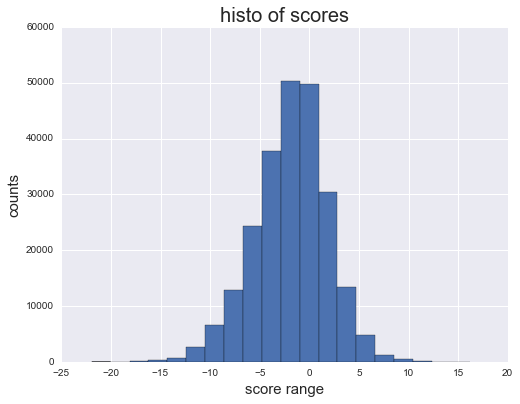

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel('score range', fontsize=15)
ax.set_ylabel('counts', fontsize=15)
ax.set_title('histo of scores', fontsize=20)
ev_pds[34].hist(ax=ax, bins=20)

In [3]:
events = sc.textFile('20160425.export.CSV')
events.take(3)

[u'533788055\t20150426\t201504\t2015\t2015.3178\t\t\t\t\t\t\t\t\t\t\tAUS\tAUSTRALIA\tAUS\t\t\t\t\t\t\t\t1\t042\t042\t04\t1\t1.9\t4\t1\t4\t1.85185185185185\t0\t\t\t\t\t\t\t4\tPeachester, Queensland, Australia\tAS\tAS04\t-26.8455\t152.884\t-1594206\t4\tPeachester, Queensland, Australia\tAS\tAS04\t-26.8455\t152.884\t-1594206\t20160425\thttp://www.sunshinecoastdaily.com.au/news/demand-for-acreage-lots-pushes-up-property-prices/3006492/',
 u'533788056\t20150426\t201504\t2015\t2015.3178\t\t\t\t\t\t\t\t\t\t\tAUS\tAUSTRALIA\tAUS\t\t\t\t\t\t\t\t1\t042\t042\t04\t1\t1.9\t2\t1\t2\t1.85185185185185\t0\t\t\t\t\t\t\t4\tLondon, London, City of, United Kingdom\tUK\tUKH9\t51.5\t-0.116667\t-2601889\t4\tLondon, London, City of, United Kingdom\tUK\tUKH9\t51.5\t-0.116667\t-2601889\t20160425\thttp://www.sunshinecoastdaily.com.au/news/demand-for-acreage-lots-pushes-up-property-prices/3006492/',
 u'533788057\t20150426\t201504\t2015\t2015.3178\t\t\t\t\t\t\t\t\t\t\tLEG\tREPRESENTATIVES\t\t\t\t\t\tLEG\t\t\t1\t043

In [7]:
# original candidate count
# def eventWordCount(index, lines):
#     import csv
#     from string import punctuation, maketrans
#     import itertools
#     import re
#     if index==0:
#         lines.next()
#     reader = csv.reader(itertools.imap(lambda x: x.encode('utf-8'), lines), delimiter='\t')
#     for row in reader:
#         (day, score, url) = (row[1], row[34], row[-1])
#         candidates = set(url.lower().translate(maketrans(punctuation, ','*len(punctuation))).split(','))
#         if len(ls.intersection(candidates)) > 0:
#             yield (','.join(sorted(list(ls.intersection(candidates)))), float(score))
# #            yield (','.join(sorted(list(ls.intersection(set(row[-1].lower().translate(maketrans(punctuation, ','*len(punctuation))).split(',')))))), 1)
#             # row #(ls.intersection(set(row[-1].lower().translate(maketrans(punctuation, ','*len(punctuation))).split(','))))
# #        yield ls.intersection(row[-1].lower().translate(maketrans(punctuation, ','*len(punctuation))))
# #         if (ls.intersection(re.sub(punctuation, ',', row[-1].lower()))) > 0:
# #             yield ls.intersection(re.sub(punctuation, ',', row[-1].lower()))
        
# eventwc = events.mapPartitionsWithIndex(eventWordCount).cache()
# eventwc.take(20)

In [8]:
def eventWordCount(index, lines):
    
    '''
    author: Xia Wang
    
    This function maps the candidates of each election cycle and return a tuple of
    (candidate name, media attitude). It first makes sure the encoding is utf-8
    because there are characters like e' that cannot be decoded by the ancsii codec.
    Then it parse the http string (last column of the input files) to find out if 
    the last name of a candidate is present. For the rows where candidate names are
    present, the name of the candidate and the media attitude towards it will be
    output as a tuple.
    
    TODO: The function uses a list of corresponding candidate names. Decide whether
    to create this list internally to each map script and use a different map script
    for each election cycle, or to create a csv file with the list provided.
    
    parameters:
    ----------------------
    index: the index of the input file
    lines: the content of the row
    '''
    
    import csv
    from string import punctuation, maketrans
    import itertools
    import re
    if index == 0:
        lines.next()
    reader = csv.reader(itertools.imap(lambda x: x.encode('utf-8'), lines), delimiter='\t')
    for row in reader:
        (day, score, url) = (row[1], row[34], row[-1])  # find the corresponding info
        # change all punctuations to comma, change all letter case to lower, and split the words
        words = set(url.lower().translate(maketrans(punctuation, ','*len(punctuation))).split(','))
        if len(ls.intersection(words)) > 0:  # ls is a list that contains all the relevant candidate names
            for candidate in list(ls.intersection(words)):
                yield (candidate, float(score))
                
if __name__ == '__main__':
    events.mapPartitionsWithIndex(eventWordCount).cache()

[('clinton', 3.17758651952913),
 ('clinton', 3.17758651952913),
 ('clinton', 3.17758651952913),
 ('clinton', 3.17758651952913),
 ('clinton', 4.41767068273092),
 ('clinton', 3.43195266272189),
 ('cruz', 1.50550379477001),
 ('cruz', -0.830387353756589),
 ('trump', -0.830387353756589),
 ('clinton', -0.35971223021583)]

In [24]:
# word count
# from operator import add
counts = newtry.countByKey()
counts

defaultdict(int,
            {'clinton': 1520,
             'cruz': 2941,
             'rubio': 16,
             'sanders': 1253,
             'trump': 4020})

In [25]:
# average senti score
score = newtry.mapValues(lambda x: (x, 1)) \
               .reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1])) \
               .collect()
avg = [(i[0], i[1][0]/i[1][1]) for i in score]
avg

[('sanders', -0.8010542827089455),
 ('cruz', -0.3446223716339522),
 ('clinton', -0.7245645832345898),
 ('trump', -0.6607794128064405),
 ('rubio', -0.010789633288540074)]

In [11]:
# from operator import add
# counts = eventwc.countByKey()
# counts

In [12]:
# score = eventwc.mapValues(lambda x: (x, 1)) \
#                .reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1])) \
#                .collect()
# avg = [(i[0], i[1][0]/i[1][1]) for i in score]
# avg

In [18]:
# print 'sanders: {:.4f}'.format((-671.5 / 948))
# print 'clinton: {:.4f}'.format((-388.1 / 795))
# print 'trump: {:.4f}'.format((-1662.0 / 1763))

In [19]:
# b = 'jdlsf.sldfj;/.sdfjlsja0=-dDFEsf1'
# row[-1].lower().translate(None, punctuation)

In [20]:
# 'a'.translate(None, punctuation)

In [21]:
# print u'\xe8'

In [22]:
# ls.symme

In [23]:
# cnt = 0
# for url in eventwc:
#     found = False
#     if 'barack' in url.lower():
#         found = True
#     if 'obama' in url.lower():
#         found = True
#     if found:
#         print url
#     if cnt>20:
#         break
#     cnt+=1

In [23]:
def eventWordCount(index, lines):
    '''
    author: Xia Wang
    This function maps the candidates of each election cycle and return a
    tuple of (candidate name, media attitude). It first makes sure the
    encoding is utf-8 because there are characters like e' that cannot be
    decoded by the ancsii codec. Then it parse the http string (last column
    of the input files) to find out if the last name of a candidate is present.
    For the rows where candidate names are present, the name of the candidate and
    the media attitude towards it will be output as a tuple.

    TODO: The function uses a list of corresponding candidate names. Decide whether
    to create this list internally to each map script and use a different map script
    for each election cycle, or to create a csv file with the list provided. Also
    modify the __main__ part, specify how the map takes place.

    parameters:
    ----------------------

    index: the index of the input file
    lines: the content of the row
    '''
    ls = set(['clinton', 'sanders', 'trump', 'cruz', 'rubio'])
    # do something about this list
    import csv
    from string import punctuation, maketrans
    import itertools
    if index == 0:
        lines.next()
    reader = csv.reader(itertools.imap(lambda x: x.encode('utf-8'), lines),
                        delimiter='\t')
    for row in reader:
        (day, score, url) = (row[1], row[34], row[-1])
        # find the corresponding info
        # change all punctuations to comma, change all
        # letter case to lower, and split the words
        words = set(url.lower()
                       .translate(maketrans(punctuation,
                                            ',' * len(punctuation)))
                       .split(','))
        if len(ls.intersection(words)) == 1:
            # ls is a set that contains all the relevant candidate names
            for candidate in list(ls.intersection(words)):
                yield (candidate, float(score), day)

if __name__ == '__main__':
    # !!!!!!!do something here!!!!!!!
    output = events.mapPartitionsWithIndex(eventWordCount).cache()

In [24]:
output.take(10)

[('clinton', 3.17758651952913, '20150426'),
 ('clinton', 3.17758651952913, '20150426'),
 ('clinton', 3.17758651952913, '20150426'),
 ('clinton', 3.17758651952913, '20150426'),
 ('clinton', 4.41767068273092, '20160425'),
 ('clinton', 3.43195266272189, '20160425'),
 ('cruz', 1.50550379477001, '20160425'),
 ('clinton', -0.35971223021583, '20160425'),
 ('clinton', -0.35971223021583, '20160425'),
 ('clinton', 0.71428571428571, '20160425')]

In [ ]:
# def extractCandidate(index, lines):
#     import csv
#     if index==0:
#         lines.next()
#     reader = csv.reader(lines, delimiter='\t')
#     for row in reader:
#         if row[2]!='s':
#             (dbn, takers, score) = (row[0], int(row[2]), int(row[4]))
#             yield (dbn, (score*takers, takers))
        
# satScores = sat.mapPartitionsWithIndex(extractScores)

In [25]:
counts = output.countByKey()
counts

defaultdict(int,
            {'clinton': 795,
             'cruz': 1061,
             'rubio': 11,
             'sanders': 948,
             'trump': 1763})

In [26]:
# average senti score
score = output.mapValues(lambda x: (x, 1)) \
               .reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1])) \
               .collect()
avg = [(i[0], i[1][0]/i[1][1]) for i in score]
avg

[('sanders', -0.7083500217917778),
 ('cruz', -0.3059769644476606),
 ('clinton', -0.48819834144363405),
 ('trump', -0.9426931027011101),
 ('rubio', 0.2313167259786499)]

In [17]:
from string import punctuation, maketrans
import sys


def eventWordCount(parts):

    '''
    author: Xia Wang
    This function maps the candidates of each election cycle and return a
    tuple of (candidate name, media attitude). It first makes sure the
    encoding is utf-8 because there are characters like e' that cannot be
    decoded by the ancsii codec. Then it parse the http string (last column
    of the input files) to find out if the last name of a candidate is
    present.
    For the rows where candidate names are present, the name of the candidate
    and the media attitude towards it will be output as a tuple.

    TODO: The function uses a list of corresponding candidate names. Decide
    whether to create this list internally to each map script and use a
    different map script for each election cycle, or to create a csv file
    with the list provided. Also modify the __main__ part, specify how the
    map takes place.

    parameters:
    ----------------------

    index: the index of the input file
    lines: the content of the row
    '''
    ls = set(['clinton', 'sanders', 'trump', 'cruz', 'rubio'])
    # do something about this list
    for line in parts:
        rowls = line.encode('utf-8').split('\t')
        (date, score, url) = (rowls[1], rowls[34], rowls[-1])
        # find the corresponding info
        # change all punctuations to comma, change all
        # letter case to lower, and split the words
        words = set(url.lower()
                       .translate(maketrans(punctuation,
                                            ',' * len(punctuation)))
                       .split(','))
        if len(ls.intersection(words)) == 1:
            # ls is a list that contains all the relevant candidate names
            for candidate in list(ls.intersection(words)):
                yield (candidate, float(score), date)


# def countReduce(inputfile):
#     inputfile.countByKey()


# def scoreReduce(inputfile):
#     inputfile.mapValues(lambda x: (x, 1)) \
#              .reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1])) \
#              .collect()


if __name__ == '__main__':
#    sc = pyspark.SparkContext()
    events = sc.textFile('20160425.export.CSV')
    # !!!!!!!do something here!!!!!!! events is the textFile RDD
    # counts = events.mapPartitions(eventWordCount).cache().countByKey()
    attitude = events.mapPartitions(eventWordCount).mapValues(lambda x:
                                                                (x, 1)) \
                                                   .reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1]))
    # counts.saveAsTextFile('output1.txt')
    attitude.saveAsTextFile('output3.txt')

In [27]:
from string import punctuation, maketrans
import sys


def eventWordCount(index, lines):
    '''
    author: Xia Wang
    This function maps the candidates of each election cycle and return a
    tuple of (candidate name, media attitude). It first makes sure the
    encoding is utf-8 because there are characters like e' that cannot be
    decoded by the ancsii codec. Then it parse the http string (last column
    of the input files) to find out if the last name of a candidate is present.
    For the rows where candidate names are present, the name of the candidate and
    the media attitude towards it will be output as a tuple.

    TODO: The function uses a list of corresponding candidate names. Decide whether
    to create this list internally to each map script and use a different map script
    for each election cycle, or to create a csv file with the list provided. Also
    modify the __main__ part, specify how the map takes place.

    parameters:
    ----------------------

    index: the index of the input file
    lines: the content of the row
    '''
    ls = set(['clinton', 'sanders', 'trump', 'cruz', 'rubio'])
    # do something about this list
    import csv
    from string import punctuation, maketrans
    import itertools
    if index == 0:
        lines.next()
    reader = csv.reader(itertools.imap(lambda x: x.encode('utf-8'), lines),
                        delimiter='\t')
    for row in reader:
        (day, score, url) = (row[1], row[34], row[-1])
        # find the corresponding info
        # change all punctuations to comma, change all
        # letter case to lower, and split the words
        words = set(url.lower()
                       .translate(maketrans(punctuation,
                                            ',' * len(punctuation)))
                       .split(','))
        if len(ls.intersection(words)) == 1:
            # ls is a set that contains all the relevant candidate names
            for candidate in list(ls.intersection(words)):
                yield (candidate, float(score), day)

                
if __name__ == '__main__':
#    sc = pyspark.SparkContext()
    events = sc.textFile('20160425.export.CSV')
    # !!!!!!!do something here!!!!!!! events is the textFile RDD
    # counts = events.mapPartitionsWithIndex(eventWordCount).cache().countByKey()
    attitude = events.mapPartitionsWithIndex(eventWordCount).mapValues(lambda x:
                                                                (x, 1)) \
                                                   .reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1]))
    # print counts
    attitude.saveAsTextFile('output3.txt')